# Team Mollie Project 3


## (A) Choice of population with supporting expenditure data

We are going to look at Niger and Nigeria since both of them are in West Africa. They have a similar culture and religious background so we can keep most things constant to compare the real influenced factors to their food demand, such as income and population structure. The two nations have relatively drastic differences in income per capita which makes a comparison of demand for varying foods interesting to examine.

 ### Prepare to Acquire DataFrames for Niger and Nigeria

In [1]:
# prepare the r requirement
!pip install -r requirements.txt

In [2]:
# import all package that we will use in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from eep153_tools.sheets import read_sheets

## Niger Data

In [3]:
Niger_data_EX_HH = '1czBgkaoR5cFjTYI1fiomSsFwCeKUmPwR9zFmdHM--e8'

In [4]:
x = read_sheets(Niger_data_EX_HH,sheet='Expenditures')
x.columns.name = 'j'      

c = read_sheets(Niger_data_EX_HH,sheet="Consumption")
c.columns.name = 'j'

d = read_sheets(Niger_data_EX_HH,sheet="HH Characteristics")
d.columns.name = 'k'

# Exp_Niger may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))
y = y.replace(0,np.nan) # Replace zeros with missing

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
# the log of food expenditures
y.head()

,,j,Alcoholic beverages,Alcoholic beverages taken out of home,Bambara groundnut,Baobab leaves,Bean fritters,Beans,Beef,Biscuit,Boiled beans,Bowl of millet with milk,...,Sweet potato,Taro and cocoyam,Tea bag,Tea hot drink,Tomato paste,Watermelon,Wheat flour,Yam tuber,Yodo,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
101,2011,Niger,NaN,NaN,NaN,NaN,4.60517,5.521461,NaN,NaN,6.214608,NaN,...,NaN,NaN,5.703782,NaN,NaN,NaN,NaN,NaN,NaN,5.991465
102,2011,Niger,NaN,NaN,NaN,6.214608,NaN,6.745236,8.294050,NaN,6.907755,6.214608,...,NaN,NaN,NaN,NaN,6.745236,NaN,NaN,NaN,NaN,6.907755
103,2011,Niger,NaN,NaN,NaN,NaN,4.60517,NaN,6.214608,NaN,6.214608,NaN,...,NaN,NaN,6.214608,NaN,5.703782,NaN,NaN,NaN,NaN,6.551080
104,2011,Niger,NaN,NaN,NaN,NaN,NaN,NaN,7.600902,NaN,6.214608,5.703782,...,NaN,NaN,NaN,NaN,6.774224,NaN,NaN,NaN,NaN,6.214608
105,2011,Niger,NaN,NaN,NaN,NaN,NaN,7.130899,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.55108,5.703782,NaN,NaN,NaN,NaN,6.856462


In [6]:
# consumption for different food
c.head()

j,i,t,m,u,Alcoholic beverages,Alcoholic beverages taken out of home,Bambara groundnut,Baobab leaves,Bean fritters,Beans,...,Sweet potato,Taro and cocoyam,Tea bag,Tea hot drink,Tomato paste,Watermelon,Wheat flour,Yam tuber,Yodo,Yogurt
0,101,2011,Niger,kg,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,2011,Niger,gramme,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,2011,Niger,kg,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102,2011,Niger,litre,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103,2011,Niger,kg,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Household Characteristics for each family
d.head()

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,t,m,,,,,,,,,,,,,,
101,2011,Niger,0,0,0,1,1,0,1,0,1,0,1,0,1,0
102,2011,Niger,1,0,0,0,0,1,0,1,0,0,0,1,0,0
103,2011,Niger,1,0,1,0,0,0,1,2,1,1,0,1,0,0
104,2011,Niger,1,0,0,0,1,0,0,0,0,0,0,1,0,0
105,2011,Niger,0,0,0,0,1,1,0,0,1,1,0,0,1,0


## (A) Estimation Demand System for Niger

In [8]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [9]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

In [10]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [11]:
from cfe import Regression

result = Regression(y=y,d=d)

In [12]:
result.predicted_expenditures()

i       t     m      j            
101     2011  Niger  Baobab leaves     241.063428
                     Bean fritters     515.453603
                     Beans             557.963154
                     Beef             2713.254929
                     Biscuit           400.937696
                                         ...     
270012  2014  Niger  Tea bag           565.736200
                     Tomato paste      524.004183
                     Yam tuber        2007.412736
                     Yodo              149.103354
                     Yogurt            743.589408
Length: 431514, dtype: float64

Text(0, 0.5, 'Actual Log Expenditures')

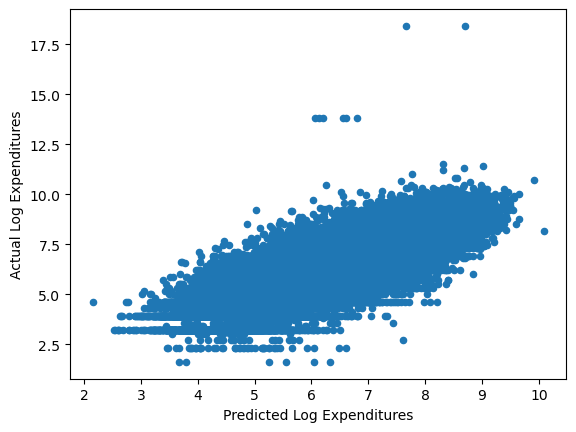

In [13]:
# Create DataFrame with y and yhat
df = pd.DataFrame({'y': y, 'yhat': result.get_predicted_log_expenditures()})

# Create scatter plot
fig, ax = plt.subplots()
df.plot.scatter(x='yhat', y='y', ax=ax)

# Set axis labels
ax.set_xlabel('Predicted Log Expenditures')
ax.set_ylabel('Actual Log Expenditures')

In [14]:
# obtain the estimated coefficients of the linear regression model.
# This allows you to see which household characteristics have the smallest and largest effects on log expenditures.
result.get_beta().sort_values()

j
Corn             0.113670
Millet           0.115881
Cornstarch       0.168015
Salt             0.238408
Squash           0.252291
                   ...   
Powdered milk    0.667569
Fresh fish       0.713377
Other citrus     0.725565
Biscuit          0.753227
Dates            0.784102
Name: beta, Length: 61, dtype: float64

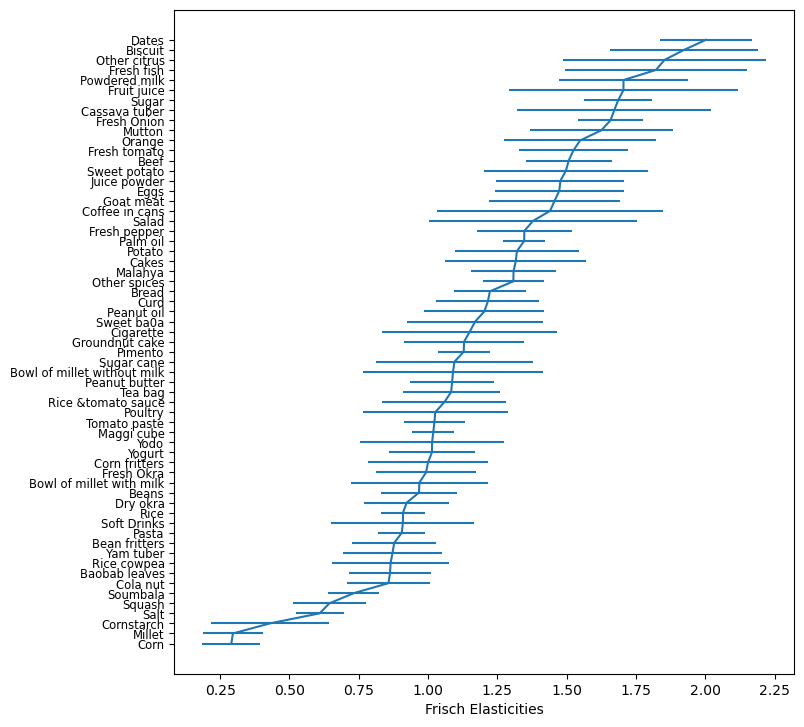

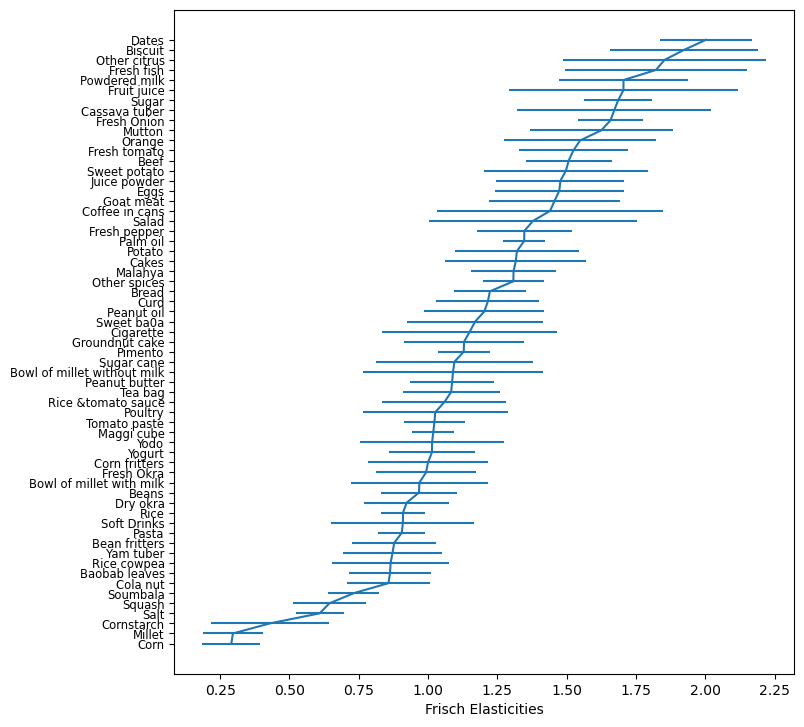

In [15]:
# visualize the estimated coefficients of the linear regression model.
result.graph_beta()

In [16]:
# These coefficients indicate the sensitivity of demand for each good in each market to changes in the price of that good.
result.gamma

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,Constant
j,,,,,,,,,,,,,,,
Baobab leaves,0.002876,0.087080,0.024776,0.110342,0.036986,0.035971,0.096028,0.056875,0.076398,0.031420,0.017666,0.048583,0.005054,0.071589,-0.316853
Bean fritters,0.001751,0.053997,0.062068,0.088132,0.025083,0.026234,0.044354,0.068347,0.033814,0.065778,0.143900,0.056137,-0.011356,0.015656,-0.230889
Beans,0.065742,0.099401,0.057865,0.019719,0.045392,0.021033,0.124675,0.037876,0.071023,0.050049,0.061067,0.031031,-0.055062,0.041826,-0.338644
Beef,-0.066320,-0.010243,-0.009488,0.023016,0.101104,0.325485,0.179146,-0.066953,-0.016854,0.016370,0.062933,0.155050,0.160964,0.018463,-0.552304
Biscuit,-0.016792,-0.020668,-0.030899,0.067606,0.062117,0.152637,-0.000361,-0.014089,-0.024748,-0.046824,0.119974,0.115475,0.138348,-0.011641,-0.117374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tea bag,-0.054718,-0.012112,0.009655,0.045879,0.065410,0.152292,0.101659,-0.032899,-0.002950,0.033133,0.004932,0.060434,0.030641,-0.019792,-0.306508
Tomato paste,-0.002639,0.000274,0.025459,0.028323,0.078050,0.145294,0.068736,0.001269,-0.021521,0.034017,0.059225,0.093497,0.126565,0.010717,-0.371622
Yam tuber,-0.075946,-0.028175,-0.024232,0.154928,0.064916,0.164918,0.126051,-0.055406,-0.027405,0.067177,0.073436,0.147480,0.141000,0.023074,-0.457719


In [17]:
result.to_pickle('my_estimates.pickle')

In [18]:
import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')

## (B) Nutritional content

In [36]:
RDIs = read_sheets('https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/')

bmin = RDIs['diet_minimums'].set_index('Nutrition')

# Drop string describing source
bmin = bmin.drop('Source',axis=1)

bmin

Key available for students@eep153.iam.gserviceaccount.com.


,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


## Nigeria Data

In [3]:
Nigeria_data_EX_HH = '18BmViIKPUVEj1ImmzIJkJ3cy-ymsditL6r0ZGE2tj_w'

In [4]:
x = read_sheets(Nigeria_data_EX_HH,sheet='Expenditures')
x.columns.name = 'j'      

c = read_sheets(Nigeria_data_EX_HH,sheet="Consumption")
c.columns.name = 'j'

d = read_sheets(Nigeria_data_EX_HH,sheet="Household Characteristics")
d.columns.name = 'k'

# Exp_Niger may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))
y = y.replace(0,np.nan) # Replace zeros with missing

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
# the log of food expenditures
y.head()

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Ba0as,Baby milk powder,Beef,Beer (local and imported),Biscuits,...,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,5.298317,NaN,6.214608,6.291569,NaN,...,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,NaN,NaN,7.313220
10002,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,5.192957,NaN,7.090077,7.600902,NaN,...,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,NaN,NaN,7.090077
10003,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,4.605170,NaN,6.214608,NaN,NaN,...,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10004,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,4.605170,NaN,6.214608,NaN,NaN,...,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10006,2010,Nigeria,NaN,NaN,NaN,NaN,NaN,5.703782,NaN,5.703782,NaN,NaN,...,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,NaN,NaN,5.991465


In [6]:
c.head()

j,i,t,m,u,"(Cocoyam, Spinach, etc)",Eggs,Animal fat,Apples,Avocado pear,Baby milk powder,...,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
0,10001.0,2010.0,Nigeria,Kilograms,NaN,0.89,NaN,NaN,NaN,NaN,...,1.5,NaN,0.42,1.0,NaN,NaN,3.0,NaN,NaN,16.0
1,10001.0,2010.0,Nigeria,Litres,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002.0,2010.0,Nigeria,Kilograms,NaN,0.89,NaN,NaN,NaN,NaN,...,1.8,0.12,0.56,1.0,NaN,NaN,2.0,NaN,NaN,13.8
3,10002.0,2010.0,Nigeria,Litres,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10003.0,2010.0,Nigeria,Kilograms,NaN,0.44,NaN,NaN,NaN,NaN,...,1.4,0.30,0.21,1.0,NaN,NaN,0.6,NaN,NaN,4.6


In [7]:
d.head()

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,t,m,,,,,,,,,,,,,,
10001,2010,Nigeria,0,0,0,0,1,2,0,1,0,0,0,1,2,0
10002,2010,Nigeria,0,0,1,1,1,1,0,0,0,0,0,2,1,0
10003,2010,Nigeria,0,1,1,1,0,0,1,0,0,1,0,0,1,0
10004,2010,Nigeria,0,0,1,0,0,0,1,0,0,0,0,0,0,1
10006,2010,Nigeria,0,0,0,0,1,1,0,0,0,0,0,1,0,0


## (A) Estimation Demand System for Nigeria

In [8]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [9]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

In [10]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [11]:
from cfe import Regression

result = Regression(y=y,d=d)

In [12]:
result.predicted_expenditures()

i       t     m        j                      
10001   2010  Nigeria  (Cocoyam, Spinach, etc)     156.910048
                       Agricultural eggs           397.386164
                       Ba0as                       265.670823
                       Beef                        999.499778
                       Bread                       394.282770
                                                     ...     
379155  2018  Nigeria  Tomato puree(canned)        269.493372
                       Tomatoes                    308.528498
                       Wheat flour                 883.595705
                       White beans                 880.678452
                       Yam-roots                  1251.825286
Length: 708167, dtype: float64

Text(0, 0.5, 'Actual Log Expenditures')

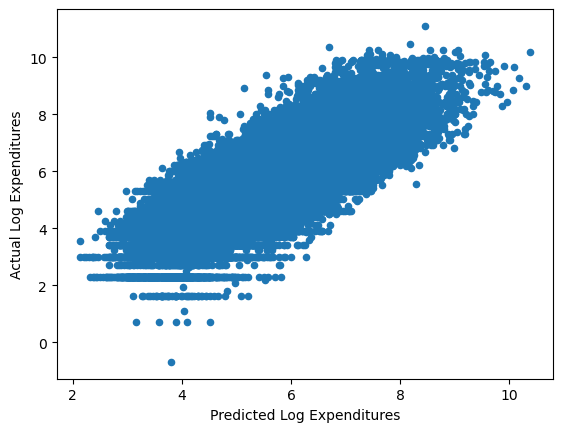

In [13]:
# Create DataFrame with y and yhat
df = pd.DataFrame({'y': y, 'yhat': result.get_predicted_log_expenditures()})

# Create scatter plot
fig, ax = plt.subplots()
df.plot.scatter(x='yhat', y='y', ax=ax)

# Set axis labels
ax.set_xlabel('Predicted Log Expenditures')
ax.set_ylabel('Actual Log Expenditures')

In [14]:
# obtain the estimated coefficients of the linear regression model.
# This allows you to see which household characteristics have the smallest and largest effects on log expenditures.
result.get_beta().sort_values()

j
Fish-Frozen                             0.246522
Other vegetables (fresh or canned)      0.252196
Garden eggs/egg plant                   0.257643
Okra-fresh                              0.291950
Pineapples                              0.295192
(Cocoyam, Spinach, etc)                 0.305219
Chicken                                 0.317700
Cassava flour                           0.320844
Goat                                    0.324575
Gari -Yellow                            0.326508
Milk tinned (unsweetened)               0.335120
Plantains                               0.336814
Okra-dried                              0.338025
Tomatoes                                0.340383
Beef                                    0.341900
Palm oil                                0.342824
Soft drinks (Coca cola, spirit etc)     0.343210
Yam-roots                               0.347729
Tomato puree(canned)                    0.351851
Orange/tangerine                        0.361484
Brown beans       

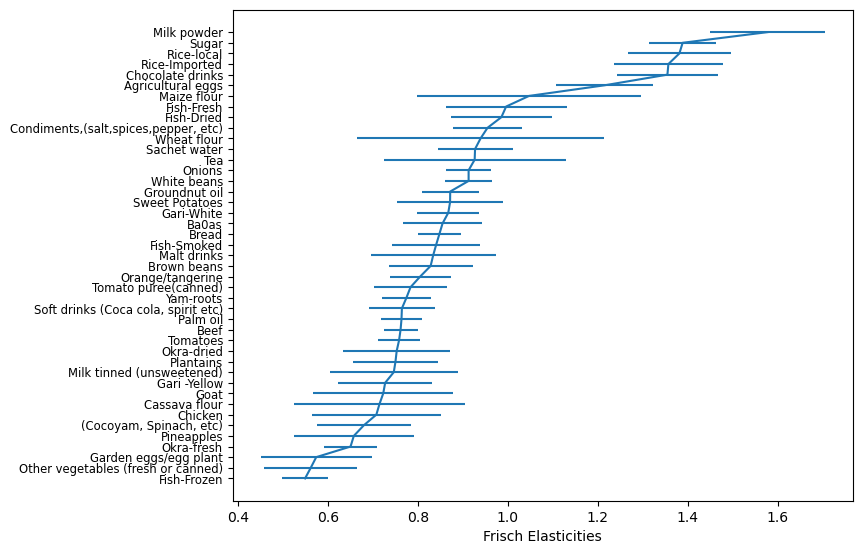

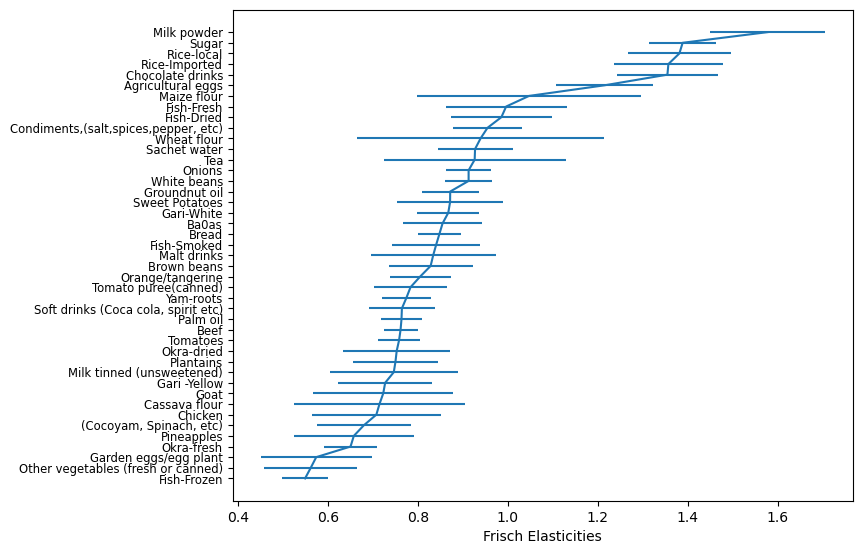

In [15]:
# visualize the estimated coefficients of the linear regression model.
result.graph_beta()

In [16]:
# These coefficients indicate the sensitivity of demand for each good in each market to changes in the price of that good.
result.gamma

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,Constant
j,,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.015211,0.012328,0.030437,-0.033648,0.048811,0.057712,0.100824,0.031928,0.028969,0.033796,0.048636,0.050343,0.070529,0.031572,-0.197610
Agricultural eggs,0.005718,0.047544,0.050343,0.015709,0.090120,0.220907,0.184049,0.052863,0.053977,0.019360,0.028518,0.093852,0.103779,-0.060642,-0.475417
Ba0as,0.037719,0.019419,0.046198,0.056600,0.095288,0.124408,0.082785,0.023898,0.008956,0.050680,0.077663,0.056182,0.068514,-0.001946,-0.357291
Beef,0.035505,0.045699,0.032527,0.059776,0.084539,0.156363,0.147182,0.008472,0.033462,0.044251,0.055784,0.099275,0.059305,-0.004838,-0.434168
Bread,0.019078,0.050976,0.031738,0.055844,0.102621,0.172572,0.140646,0.016643,0.046851,0.063101,0.072462,0.102975,0.095966,0.017489,-0.442382
Brown beans,0.040285,0.073054,0.049356,0.066288,0.070135,0.130190,0.110150,0.042125,0.025518,0.062155,0.089576,0.073514,0.110064,0.060717,-0.388429
Cassava flour,0.003551,0.100346,0.033697,0.086040,0.066772,0.088684,0.074740,-0.067494,0.068916,-0.010535,0.085072,0.052714,0.093498,0.013579,-0.296563
Chicken,-0.007341,0.033700,-0.014049,0.033073,0.082735,0.134365,0.162246,-0.062973,0.012011,0.011497,0.043152,0.103389,0.126839,-0.004911,-0.527432
Chocolate drinks,0.067986,0.016920,0.045461,0.003492,0.072197,0.146115,0.184304,0.076302,0.037159,0.028088,0.077560,0.131107,0.080667,-0.002731,-0.368350


In [17]:
result.to_pickle('my_estimates.pickle')

In [18]:
import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')

## (B) Nutritional content & Nutritional adequacy

In [98]:
InputFiles = {'Expenditures':('18BmViIKPUVEj1ImmzIJkJ3cy-ymsditL6r0ZGE2tj_w','Expenditures'),
              'HH Characteristics':('18BmViIKPUVEj1ImmzIJkJ3cy-ymsditL6r0ZGE2tj_w','Household Characteristics'),
              'Consumption':('18BmViIKPUVEj1ImmzIJkJ3cy-ymsditL6r0ZGE2tj_w','Consumption'),
              'FCT':('18BmViIKPUVEj1ImmzIJkJ3cy-ymsditL6r0ZGE2tj_w','FCT'),
              'RDI':('18BmViIKPUVEj1ImmzIJkJ3cy-ymsditL6r0ZGE2tj_w','RDI'),}

In [99]:
def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get consumption
c = get_clean_sheet(InputFiles['Consumption'][0],
                    sheet=InputFiles['Consumption'][1])

if 'm' not in c.columns: 
    c['m'] = 1

c = c.set_index(['i','t','m'])
c.columns.name = 'j'

c = c.apply(lambda x: pd.to_numeric(x,errors='coerce'))
c = c.replace(0,np.nan)

# Get the fct ready 
fct = get_clean_sheet(InputFiles['FCT'][0],
                    sheet=InputFiles['FCT'][1])

fct = fct.set_index('j')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

################## RDI, if available (consider using US) #####################
rdi = get_clean_sheet(InputFiles['RDI'][0],
                    sheet=InputFiles['RDI'][1])
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [100]:
qhat = (c).dropna(how='all')
qhat = qhat.replace(np.nan,0)
qhat = qhat.loc[:,qhat.count()>0]

In [101]:
qhat

j                          u  (Cocoyam, Spinach, etc)  Eggs  Animal fat  \
i        t      m                                                         
10001.0  2010.0 Nigeria  0.0                      0.0  0.89         0.0   
                Nigeria  0.0                      0.0  0.00         0.0   
10002.0  2010.0 Nigeria  0.0                      0.0  0.89         0.0   
                Nigeria  0.0                      0.0  0.00         0.0   
10003.0  2010.0 Nigeria  0.0                      0.0  0.44         0.0   
...                      ...                      ...   ...         ...   
379148.0 2018.0 Nigeria  0.0                      0.0  0.00         0.0   
379151.0 2018.0 Nigeria  0.0                      0.0  0.00         0.0   
                Nigeria  0.0                      0.0  0.00         0.0   
379154.0 2018.0 Nigeria  0.0                      0.0  0.00         0.0   
379155.0 2018.0 Nigeria  0.0                      0.0  0.00         0.0   

j                        Apples  Avocado pear  Baby milk powder  Bananas  \
i        t      m                                                          
10001.0  2010.0 Nigeria     0.0           0.0               0.0     1.30   
                Nigeria     0.0           0.0               0.0     0.00   
10002.0  2010.0 Nigeria     0.0           0.0               0.0     1.30   
                Nigeria     0.0           0.0               0.0     0.00   
10003.0  2010.0 Nigeria     0.0           0.0               0.0     0.35   
...                         ...           ...               ...      ...   
379148.0 2018.0 Nigeria     0.0           0.0               0.0     0.00   
379151.0 2018.0 Nigeria     0.0           0.0               0.0     0.00   
                Nigeria     0.0           0.0               0.0     0.00   
379154.0 2018.0 Nigeria     0.0           0.0               0.0     0.00   
379155.0 2018.0 Nigeria     0.0           0.0               0.0     0.00   

j                         Beef  Beer  ...  Sweet Potatoes   Tea  \
i        t      m                     ...                         
10001.0  2010.0 Nigeria    1.0  0.00  ...             1.5  0.00   
                Nigeria    0.0  2.25  ...             0.0  0.00   
10002.0  2010.0 Nigeria    2.0  0.00  ...             1.8  0.12   
                Nigeria    0.0  9.00  ...             0.0  0.00   
10003.0  2010.0 Nigeria    0.3  0.00  ...             1.4  0.30   
...                        ...   ...  ...             ...   ...   
379148.0 2018.0 Nigeria  500.0  0.00  ...             0.0  0.00   
379151.0 2018.0 Nigeria    0.0  0.00  ...             0.0  0.00   
                Nigeria    0.0  0.00  ...             0.0  0.00   
379154.0 2018.0 Nigeria    1.0  0.00  ...             0.0  0.00   
379155.0 2018.0 Nigeria    1.0  0.00  ...             0.0  0.00   

j                        Tomato puree(canned)  Tomatoes  Watermelon  \
i        t      m                                                     
10001.0  2010.0 Nigeria                  0.42       1.0         0.0   
                Nigeria                  0.00       0.0         0.0   
10002.0  2010.0 Nigeria                  0.56       1.0         0.0   
                Nigeria                  0.00       0.0         0.0   
10003.0  2010.0 Nigeria                  0.21       1.0         0.0   
...                                       ...       ...         ...   
379148.0 2018.0 Nigeria                  0.00       0.0         0.0   
379151.0 2018.0 Nigeria                  0.00       0.0         0.0   
                Nigeria                  0.00       0.0         0.0   
379154.0 2018.0 Nigeria                  0.00       0.0         0.0   
379155.0 2018.0 Nigeria                  0.00       0.0         0.0   

j                        Wheat flour  White beans  Wild game meat  Yam flour  \
i        t      m                                                              
10001.0  2010.0 Nigeria          0.0          3.0             0.0        0.0   

In [102]:
fct = fct.replace(np.nan,0)
fct = fct.loc[:,fct.count()>0]
fct

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,
j,,,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",130,0.0,3.2,0,2,14.29,0.23,0.00,0.00,0.00,65,0.0,0.00,3.1,0.0,0.0
Eggs,1600,20.0,70.0,810,120,85.00,6.00,17.38,1.30,0.67,70,0.0,2.57,100.0,6.0,0.0
Animal fat,1700,98.0,60.0,500,580,325.00,30.00,7.00,1.20,3.40,0,0.0,2.15,10.0,8.0,0.0
Apples,3470,214.0,160.0,5250,1130,626.00,51.00,11.74,2.12,7.13,0,0.0,4.74,63.0,23.0,0.0
Avocado pear,2510,182.0,0.0,60,70,0.00,19.00,31.50,1.60,0.90,0,28.9,3.80,0.0,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheat flour,890,11.0,30.0,200,50,228.00,3.00,6.65,0.73,0.31,30,0.0,3.67,0.0,0.0,0.0
White beans,640,33.0,0.0,50,1620,45.00,1.00,1.00,1.50,0.20,370,4.4,0.36,0.0,0.0,0.0
Wild game meat,20,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.0,0.00,0.0,0.0,0.0


In [114]:
use = fct.index.intersection(qhat.columns)

In [119]:
nutrients = qhat[use]@fct.loc[use,:]
print(nutrients.mean().round(6))  

n
Energy          6.621560e+05
Protein         5.985145e+04
Fiber           5.298893e+03
Folate          1.548282e+05
Calcium         2.916323e+05
Carbohydrate    5.756357e+04
Iron            5.771734e+03
Niacin          1.030508e+04
Riboflavin      1.242489e+03
Thiamin         4.063324e+02
Vitamin A       1.000830e+06
Vitamin B-12    1.446132e+04
Vitamin B-6     8.326714e+02
Vitamin C       2.075723e+04
Zinc            4.881208e+03
                0.000000e+00
dtype: float64


In [120]:
z = z[rdi.columns.tolist()]

hh_rdi = z@rdi.T

# Uganda data is per week, so make this a recommended WEEKLY intake:
hh_rwi = hh_rdi*7

In [121]:
# Match up nutrient names
use = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio = (nutrients[use]/hh_rwi[use]).dropna()

nutrient_ratio

n                           Energy     Protein      Fiber     Folate  \
i        t      m                                                      
10001.0  2010.0 Nigeria   3.342624    3.862508   6.205528   4.183227   
                Nigeria   0.264518    1.331729   0.132615   0.239160   
         2012.0 Nigeria   4.961735    7.174556   3.815598   1.509091   
                Nigeria  61.934184  213.291420  23.469388  43.192208   
                Nigeria   0.392469    0.471175   0.411079   0.773974   
...                            ...         ...        ...        ...   
379148.0 2018.0 Nigeria  25.297619  153.954082   0.000000   8.928571   
379151.0 2018.0 Nigeria   0.027640    0.014550   0.066548   0.031746   
                Nigeria   0.077329    0.045635   0.204082   0.033333   
379154.0 2018.0 Nigeria   0.075000    0.519188   0.000000   0.767857   
379155.0 2018.0 Nigeria   0.018398    0.123163   0.000000   0.005952   

n                          Calcium  Carbohydrate       Iron     Niacin  \
i        t      m                                                        
10001.0  2010.0 Nigeria   2.517574      8.949349   4.323160   5.157718   
                Nigeria   0.210454      0.361427   0.241008   0.803656   
         2012.0 Nigeria   5.092764     12.079670   3.428571   3.017033   
                Nigeria  85.031540    125.420330  63.890977  71.006525   
                Nigeria   0.467959      1.072198   0.775489   0.721191   
...                            ...           ...        ...        ...   
379148.0 2018.0 Nigeria  49.285714      0.000000  52.678571  39.330357   
379151.0 2018.0 Nigeria   0.002421      0.100220   0.015038   0.027941   
                Nigeria   0.032446      0.272527   0.185464   0.033613   
379154.0 2018.0 Nigeria   0.817143      0.109890   0.664286   0.198619   
379155.0 2018.0 Nigeria   0.024643      0.000000   0.018323   0.027360   

n                        Riboflavin    Thiamin  Vitamin A  Vitamin B-12  \
i        t      m                                                         
10001.0  2010.0 Nigeria    4.876293   5.859450   4.135258      7.588086   
                Nigeria    0.374193   0.207695   0.059244      1.899160   
         2012.0 Nigeria    5.936317   3.184821   1.623377      5.714286   
                Nigeria  177.943201  62.727679  19.179221    353.225108   
                Nigeria    0.780155   0.974911   1.169351      0.000000   
...                             ...        ...        ...           ...   
379148.0 2018.0 Nigeria   35.164835   0.000000   0.000000    413.690476   
379151.0 2018.0 Nigeria    0.040110   0.017367   0.002449      0.000000   
                Nigeria    0.101648   0.047619   0.018367      0.000000   
379154.0 2018.0 Nigeria    0.508333   0.083851   0.651786      0.413690   
379155.0 2018.0 Nigeria    0.025397   0.000000   0.000000      0.275794   

n                        Vitamin B-6   Vitamin C       Zinc  
i        t      m                                            
10001.0  2010.0 Nigeria     9.199238    1.760664   2.740262  
                Nigeria     0.458974    0.062605   0.229929  
         2012.0 Nigeria     4.425626    0.906542   5.362637  
                Nigeria   135.266568  115.260347  80.582418  
                Nigeria     0.600471    0.414312   0.139780  
...                              ...         ...        ...  
379148.0 2018.0 Nigeria     7.692308    0.000000  92.207792  
379151.0 2018.0 Nigeria     0.169124    0.000000   0.000000  
                Nigeria     0.074654    0.143304   0.038961  
379154.0 2018.0 Nigeria     0.463810    1.874459   0.445113  
379155.0 2018.0 Nigeria     0.005263    0.000000   0.069951  

[39171 rows x 15 columns]

<IPython.core.display.Javascript object>


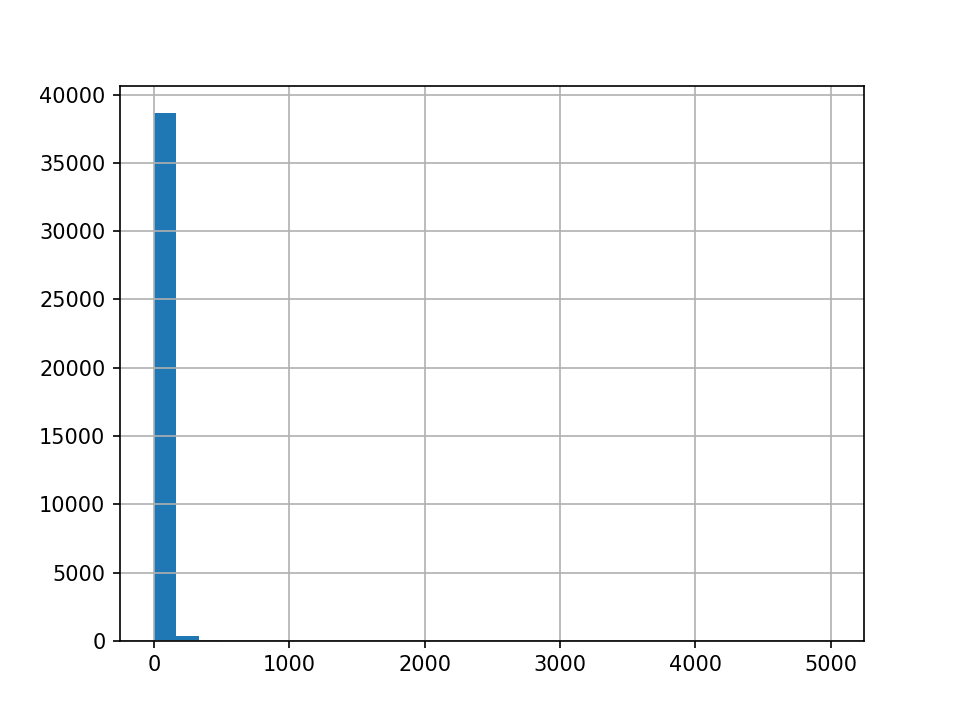

<AxesSubplot:>

In [135]:
%matplotlib notebook
(nutrient_ratio['Energy']).hist(bins=30)

## Comparison in Presentation